In [61]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [63]:
#Importing data
import pandas as pd

def load_data():
    return pd.read_csv("earthquakes.csv")

In [65]:
#Initializing Datasets
earthquakes_data = load_data()

In [67]:
#Data preparation for dataset #2 (Earthquake Dataset)
data = earthquakes_data[['latitude', 'longitude', 'depth', 'magnitude', 'date', 'time']]

#Limit to 1000
data = data.iloc[:1000]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   1000 non-null   float64
 1   longitude  1000 non-null   float64
 2   depth      1000 non-null   float64
 3   magnitude  1000 non-null   float64
 4   date       1000 non-null   object 
 5   time       1000 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 47.0+ KB


In [69]:
from sklearn.preprocessing import StandardScaler

#Scaling features for DBSCAN
scaler = StandardScaler()
X = data[['magnitude', 'longitude', 'latitude']]
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=['magnitude', 'longitude', 'latitude'])
X = X_scaled

In [71]:
from sklearn.cluster import DBSCAN
#Initialize the DBSCAN model
db = DBSCAN(eps=0.5, min_samples=3)

labels = db.fit_predict(X)
X['Cluster'] = labels
X.head()

,magnitude,longitude,latitude,Cluster
0,0.016368,-0.770038,0.227013,0
1,0.299387,-0.770145,0.227824,0
2,-1.021368,-0.909275,0.313810,0
3,-0.832689,-0.790022,0.187945,0
4,-0.644010,-0.790213,0.187180,0


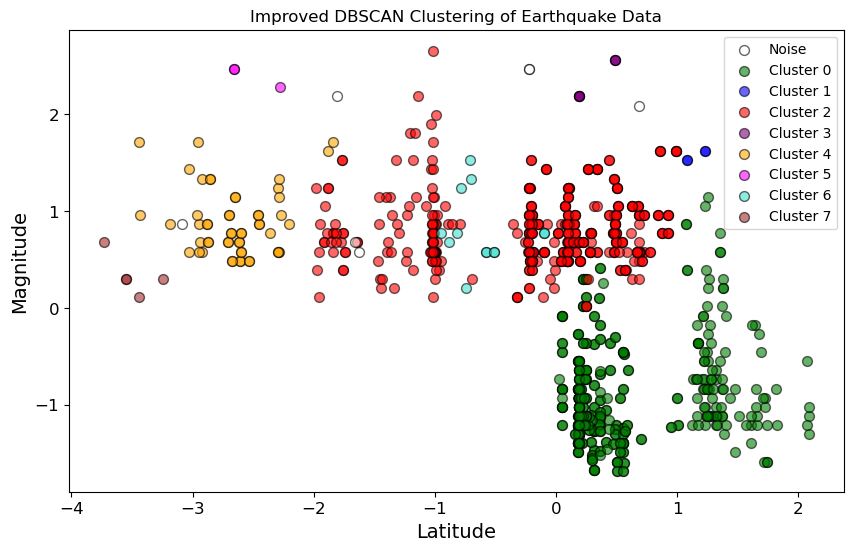

In [73]:
#Plot cell
unique_labels = X['Cluster'].unique()
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)  #Exclude noise if present
colors = {
    0: 'green', 1: 'blue', 2: 'red', 3: 'purple', 4: 'orange', 5: 'magenta', 6: 'turquoise', 7: 'brown', 
    8: 'pink', 9: 'gold', 10: 'lime', 11: 'cyan', 12: 'crimson', 13: 'violet', 14: 'indigo', 15: 'yellow'
}
handles = []
labels = []

#Plot each point with a color based on its cluster label
plt.figure(figsize=(10, 6))
for label in unique_labels:
    if label == -1:
        #Plot noise points in white
        scatter = plt.scatter(X[X['Cluster'] == label]['latitude'], 
                    X[X['Cluster'] == label]['magnitude'], 
                    c='white', label='Noise', s=50, marker='o', edgecolor='k', alpha=0.6)
    else:
        #Plot clusters with different colors
        color = colors.get(label, 'gray')
        scatter = plt.scatter(X[X['Cluster'] == label]['latitude'], 
                    X[X['Cluster'] == label]['magnitude'], 
                    color=color, label=f'Cluster {int(label)}', s=50, marker='o', edgecolor='k', alpha=0.6)

    handles.append(scatter)
    labels.append(label)

sorted_labels_and_handles = sorted(zip(labels, handles), key=lambda x: (x[0] != -1, x[0]))
sorted_labels, sorted_handles = zip(*sorted_labels_and_handles)
formatted_labels = ['Noise' if label == -1 else f'Cluster {int(label)}' for label in sorted_labels]

#Labeling the plot
plt.title("Improved DBSCAN Clustering of Earthquake Data")
plt.xlabel("Latitude")
plt.ylabel("Magnitude")
plt.legend(handles=sorted_handles, labels=formatted_labels)
plt.show()